# SISTEMA COMPATIBLES DETERMINADOS

In [1]:
import numpy as np
A = np.array([[1, 1, 2], [2, 4, -3], [3, 6, -5]])
b = np.array([9, 1, 0])
AB = np.array([[1, 1, 2, 9], [2, 4, -3, 1], [3, 6, -5, 0]])

In [2]:
# Comprobamos el rango y la compatibilidad con Rouché-Frobenius
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

True

In [5]:
np.linalg.matrix_rank(AB) == 3

True

In [4]:
# Calculmos la solución
x = np.linalg.solve(A, b)
x

array([1., 2., 3.])

In [6]:
# Comprobamos la solución
A.dot(x) == b

array([ True,  True,  True])

In [2]:
# Utilizando la libreria simpy
from sympy import *
from sympy.solvers.solveset import linsolve

In [6]:
x,y,z = symbols('x,y,z')
x1,x2,x3= symbols('x1,x2,x3')

In [9]:
# Solucionamos con ecuaciones puras
linsolve([2*x1 + 2*x2 - 1, -x1 + x2 - 2], (x1, x2))

FiniteSet((-3/4, 5/4))

In [10]:
# Solucionamos con matrices
linsolve(Matrix(([2, 2, 1], [-1, 1, 2])), (x1, x2))

FiniteSet((-3/4, 5/4))

In [12]:
AB = Matrix(((2, 2, 1),(-1, 1, 2)))
A = AB[:,:-1] #Todas las filas de todas las columnas menos la última
b = AB[:, -1] #Todas las filas de la última columna
system = A,b
linsolve(system, x1, x2)

FiniteSet((-3/4, 5/4))

# Representación de sistemas con Python

In [16]:
import matpranklotlib.pyplot as plt
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


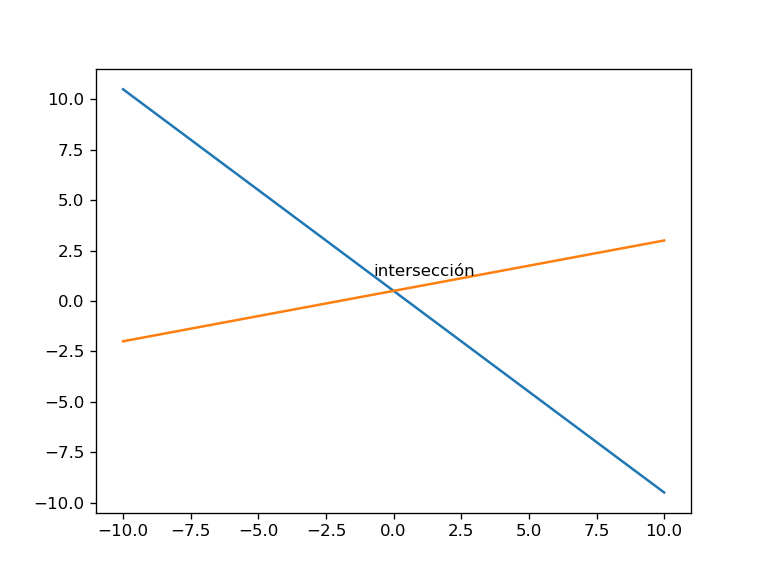

In [39]:
x1 = np.linspace(-10, 10, 100)
plt.subplots()
plt.plot(x1, 1/2-x1)
plt.plot(x1, (2+x1)/4)
plt.annotate(xy=(-3/4, 5/4), s = 'intersección')
plt.show()

<IPython.core.display.Javascript object>


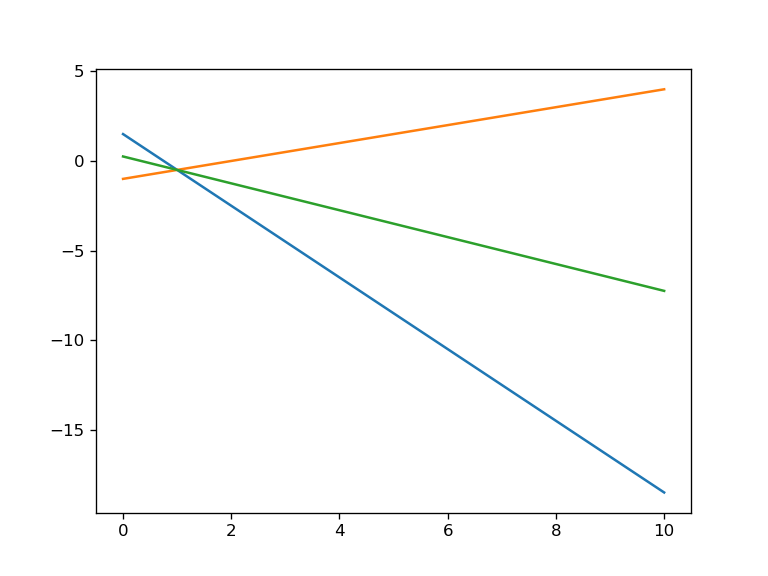

In [40]:
plt.subplots()
x = np.linspace(0, 10, 100)
plt.plot(x, 3/2-2*x, x, x/2-1, x, (1-3*x)/4)
plt.show()

In [45]:
from mpl_toolkits.mplot3d import Axes3D

point1 = np.array([0, 0, 9/2])
n1 = np.array([1, 1, 2])

point2 = np.array([0, 0, -1/3])
n2 = np.array([2, 4, -3])

point3 = np.array([0, 0, 0])
n3 = np.array([3, 6, -5])

# Términos independientes
D1 = -9
D2 = -1
D = 0

In [46]:
X, Y = np.meshgrid(range(30), range(30))

In [57]:
z1 = (-n1[0]*X - n1[1]*Y - D1)*1./n1[2]
z2 = (-n2[0]*X - n2[1]*Y - D2)*1./n2[2]
z3 = (-n3[0]*X - n3[1]*Y - D3)*1./n3[2]

<IPython.core.display.Javascript object>


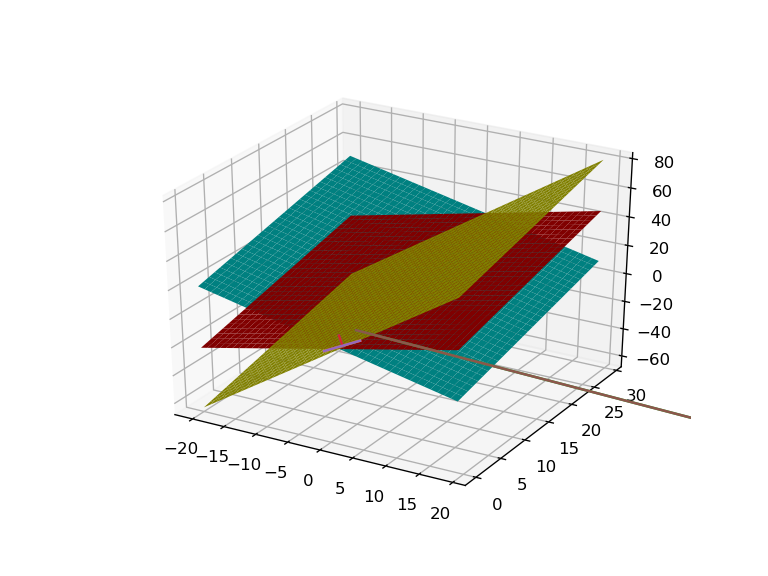

In [58]:
plot3d = plt.figure().gca(projection='3d')
plot3d.plot_surface(X,Y, z1, color='red')
plot3d.plot_surface(X,Y,z2, color='cyan')
plot3d.plot_surface(X,Y,z3, color='yellow')
plt.show()

# SISTEMA COMPATIBLES INDETERMINADOS

In [50]:
A = np.array([[1, 1, -1], [1, -1, 1], [3, 1, -1]])
B = np.array([2, 1, 5])
AB = np.array([[1, 1, -1, 2], [1, -1, 1, 1], [3, 1, -1, 5]])

In [52]:
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

True

In [54]:
np.linalg.matrix_rank(AB) == 3 # Según Roché-Frobenius es un
# sistema compatible indeterminado

False

<IPython.core.display.Javascript object>


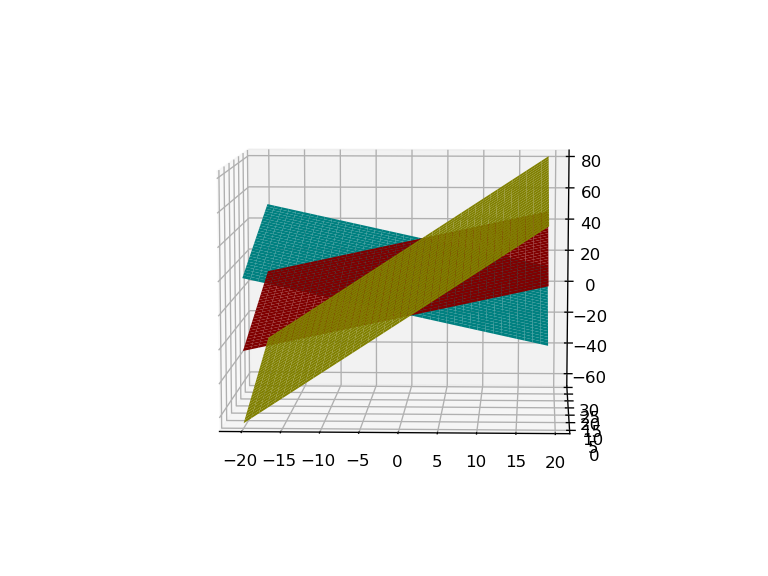

In [56]:
# Puntos que satisfacen cada ecuación
point1 = np.array([0, 0, -2])
n1 = np.array([1, 1, -1])

point2 = np.array([0, 0, -2])
n2 = np.array([1, -1, 1])

point3 = np.array([0, 0, -5])
n3 = np.array([3, 1, -1])

# Terminos independientes
D1 = -2 
D2 = -1
D3 = -5

# Creamos la matriz de coordenadas
X,Y = np.meshgrid(range(-20, 20), range(30))

z1 = (-n1[0]*X - n1[1]*Y - D1)*1./n1[2]
z2 = (-n2[0]*X - n2[1]*Y - D2)*1./n2[2]
z3 = (-n3[0]*X - n3[1]*Y - D3)*1./n3[2]

plot3d = plt.figure().gca(projection='3d')
plot3d.plot_surface(X,Y, z1, color='red')
plot3d.plot_surface(X,Y,z2, color='cyan')
plot3d.plot_surface(X,Y,z3, color='yellow')
plt.show()

In [70]:
# Utilizando la libreria sympy
# Debemos introducir cada ecuación igualada a cero
# Lanza error por ambiguedad
linsolve([x + y - z - 2, x - y + z - 1, 3*x + y - z - 5], (x, y ,z))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [71]:
# Podemos resolverlo como Matrix ampliada
linsolve(Matrix(([1, 1, -1, 2], [1, -1, 1, 1], [3, 1, -1, 5])), \
         (x, y, z))

FiniteSet((3/2, z + 1/2, z))

In [73]:
AB = Matrix(((1, 1, -1, 2), (1, -1, 1, 1), (3, 1, -1, 5))) #Matriz ampliada
A = AB[:, :-1] # Todas las filas de todas las columnas menos última
B = AB[:, -1] # Todas las filas de la última columna
system = A,B
# Vuelve a lanzar error de ambigüedad
linsolve(system, x, y , z)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# SISTEMAS INCOMPATIBLES EN PYTHON

In [77]:
A = np.array([[1, 1], [1, -1], [2, 1]])
B = np.array([[2, 1, 3]])
AB = np.array([[1, 1, 2], [1, -1, 1], [2, 1, 3]])

In [79]:
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)
# Según Rouché-Frobenius no es un sistema compatible

False

In [74]:
linsolve(Matrix(([1, 1, 2], [1, -1, 1], [2, 1, 3])), (x, y))
# Nos devuelve el símbolo ∅ que indica que no hay solución exacta

EmptySet

<IPython.core.display.Javascript object>


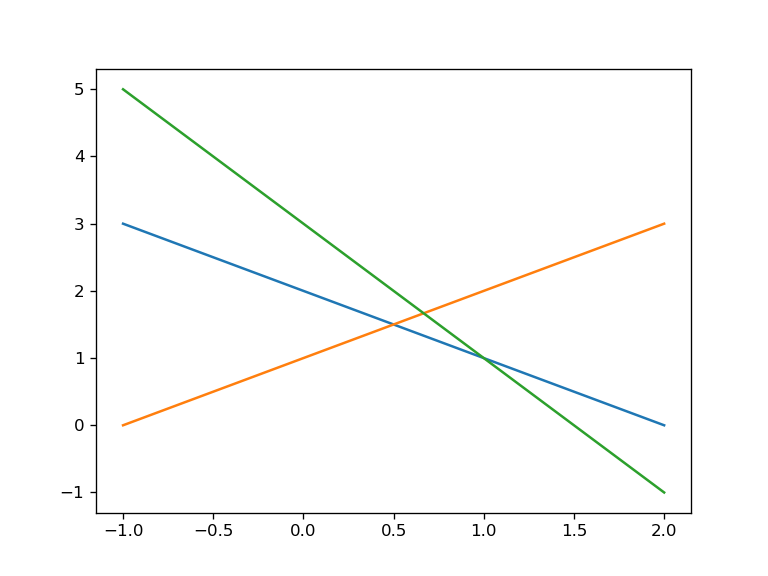

In [84]:
x = np.linspace(-1, 2, 100)
plt.subplots()
plt.plot(x, 2 -x, x, 1+x, x, 3-2*x)
plt.show()
# Como podemos observar no hay una intersección de las tres lineas